In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [2]:
# generate random data with 5 clusters
X, y = make_blobs(n_samples=200, centers=3)

In [3]:
initiate_random_centroids = lambda X, k: np.array([np.random.choice(X[:, i], k) for i in range(X.shape[1])]).T

def l2_norm(A, B):
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

def assign_resp(X, centroids, beta=3):
    dist = l2_norm(X, centroids)
    return np.array([np.exp(-beta * dist[i]) / np.exp(-beta * dist[i]).sum() for i in range(len(X))])

def adjust_centroids(X, responsibilities):
    resp_count = responsibilities.sum(axis=0)
    sum_x_per_cluster = responsibilities.T.dot(X)
    adj_centroids = sum_x_per_cluster / (resp_count.reshape(len(resp_count), 1) + .01)
    return adj_centroids



In [4]:
max_iter = 1000
prev_centroids = initiate_random_centroids(X, k=3)
resp = assign_resp(X,prev_centroids)
adjusted_centroids = adjust_centroids(X, resp)
i=0
while i < max_iter and not np.array_equal(adjusted_centroids, prev_centroids):
    prev_centroids = adjusted_centroids
    resp = assign_resp(X, prev_centroids)
    adjusted_centroids = adjust_centroids(X, resp)
    i+=1


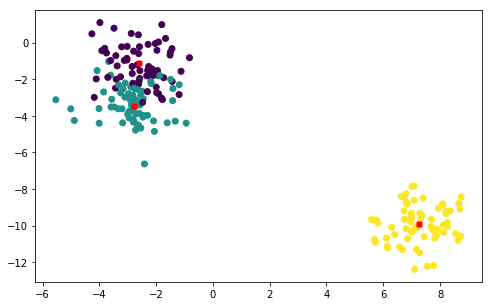

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.scatter(x=adjusted_centroids[:, 0], y=adjusted_centroids[:, 1], marker="+", lw=5, c='red')